In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read data

In [4]:
# Read one year data from a random building after FE
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/Filter_One_year_features.csv')
target = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/Filter_One_year_target.csv')

In [5]:
features.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.026712,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.102568,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.026712,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877


In [6]:
target.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# Standardise the data

1. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset. (https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler)

2. The preprocessing.scale() algorithm puts your data on one scale. This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. For example the values of X maybe like so:

    X = [1, 4, 400, 10000, 100000]

    The issue with sparsity is that it very biased or in statistical terms skewed. So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity. In regards to know how it works in mathematical detail, this follows the same concept of Normalization and Standardization (https://stackoverflow.com/questions/42325212/what-preprocessing-scale-do-how-does-it-work)

In [8]:
features_std = StandardScaler().fit_transform(features)

In [12]:
pd.DataFrame(features_std).head()

,0,1,2,3,4,5,6,7,8,9,...,2848,2849,2850,2851,2852,2853,2854,2855,2856,2857
0,-0.384046,-0.302313,1.860013,0.207543,-1.149100,-0.320715,-0.314617,-0.304878,-0.288711,-0.275025,...,-1.639718,-1.445889,0.749370,0.398822,1.707139,-1.346494,1.675901,1.722623,-0.926928,-0.132870
1,-0.384046,-0.263903,1.469148,0.158874,-1.196557,-0.320715,-0.314617,-0.304878,-0.288711,-0.275025,...,-1.376944,-1.533710,0.726632,0.356310,1.608080,-1.464930,1.451683,1.565805,-1.182783,-0.208400
2,-0.384046,-0.302313,1.860013,0.207543,-1.255878,-0.320715,-0.314617,3.279998,-0.288711,-0.275025,...,-1.639718,-1.340266,0.830436,0.398822,1.712478,-1.219753,1.675901,1.722623,-0.798606,-0.208400
3,-0.384046,-0.348404,1.692500,0.118318,-1.244013,-0.320715,-0.314617,3.279998,-0.288711,-0.275025,...,-1.582576,-1.340266,0.717536,0.443707,1.689938,-1.237944,1.621131,1.690982,-0.833207,-0.146117
4,-0.384046,-0.348404,1.692500,0.118318,-1.244013,-0.320715,-0.314617,3.279998,-0.288711,-0.275025,...,-1.582576,-1.340266,0.717536,0.443707,1.689938,-1.237944,1.621131,1.690982,-0.833207,-0.146117


# Instantiate PCA

1.The idea with going from 2858 components to low components is to reduce the running time of a supervised learning algorithm

In [13]:
# maintain 95% variance/information
pca = PCA(.95)

In [14]:
features_std_pca = pca.fit_transform(features_std)

In [17]:
pca.n_components_
# 18 features are enough to maintain 95% information

18

In [18]:
pd.DataFrame(features_std_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4.050208,-17.071477,-3.505035,-1.123575,-12.743371,-20.838663,10.354001,-14.473610,12.219461,0.471485,-3.082787,-4.330123,-6.325942,0.003901,2.393738,-1.839816,0.503235,0.389858
1,4.203166,-17.651878,-2.930480,-1.206873,-11.015148,-16.684739,10.503328,-14.389937,12.091720,-0.047680,-3.089018,-5.439553,-6.129619,0.163895,2.803942,-2.001291,0.081613,-0.729451
2,3.703726,-16.225438,-3.397368,-0.985778,-12.574749,-20.920623,9.377843,-14.224020,11.628696,0.607966,-3.331265,-4.365324,-6.379162,-0.115150,3.096875,-2.136009,0.357756,0.381068
3,5.000333,-15.788202,-2.739918,-0.657676,-12.280664,-19.050343,9.179843,-14.039454,11.184965,0.782252,-3.606283,-6.072215,-7.976908,-0.255719,3.217437,-2.332268,0.396024,-0.239494
4,5.000333,-15.788202,-2.739918,-0.657676,-12.280664,-19.050343,9.179843,-14.039454,11.184965,0.782252,-3.606283,-6.072215,-7.976908,-0.255719,3.217437,-2.332268,0.396024,-0.239494


# Graph of Explained Variance vs Number of Principal Components

code is modified from https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

In [54]:
# if n_components is not set all components are kept (2858 in this case)
pca = PCA(random_state=42)

In [55]:
pca.fit(features_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.n_components_

2858

In [57]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

2853.283479849299

In [58]:
# Explained variance on first five features
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[19.15878182280223, 14.531350906047408, 12.256397434304798, 10.600199744602032, 8.863615233350979]


In [59]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

Plot can help you understand the level of redundancy present in multiple dimensions.

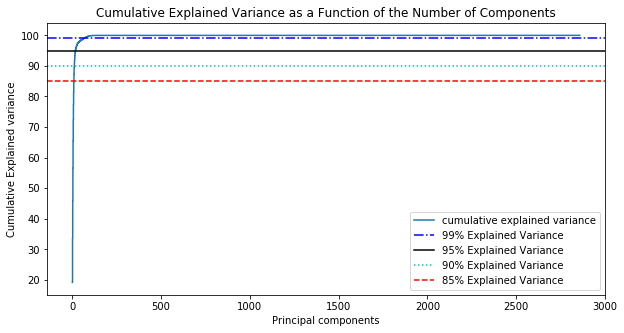

In [60]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 2859), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 99, color='b', linestyle='-.', label = '99% Explained Variance')
plt.axhline(y = 95, color='k', linestyle='-', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle=':', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

# Number of Principal Components for 99%, 95%, 90%, and 85% of Explained Variance

In [61]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
# argmax returns the position of the largest value (https://stackoverflow.com/questions/36300334/understanding-argmax)
componentsVariance = [2858, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [62]:
componentsVariance

[2858, 66, 18, 12, 10]

In [63]:
print(str(componentsVariance[0]) + ' is required to maitain 100% variance\n' +
      str(componentsVariance[1]) + ' is required to maitain 99% variance\n' +
      str(componentsVariance[2]) + ' is required to maitain 95% variance\n' +
      str(componentsVariance[3]) + ' is required to maitain 90% variance\n' +
      str(componentsVariance[4]) + ' is required to maitain 85% variance\n')

2858 is required to maitain 100% variance
66 is required to maitain 99% variance
18 is required to maitain 95% variance
12 is required to maitain 90% variance
10 is required to maitain 85% variance

